# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = 'bam'
# Create endpoint URL with each city
#city_url = url + "appid=" + weather_api_key + "&q=" + city  # YOUR CODE HERE
#print(city_url)
#city_weather = requests.get(city_url + city).json() # YOUR CODE HERE
#pprint.pprint(city_weather)
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#city_lat = city_weather['coord']['lat']
#city_lng = city_weather['coord']['lon']
#city_max_temp = city_weather['main']['temp_max']
#city_humidity = city_weather['main']['humidity']
#city_clouds = city_weather['clouds']['all']
#city_wind = city_weather['wind']['speed']
#city_country = city_weather['sys']['country']
#city_date = city_weather['dt']

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city  # YOUR CODE HERE
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
       
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | san clemente del tuyu
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | semnan
Processing Record 14 of Set 1 | ad dawadimi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | strezhevoy
Processing Record 17 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | salahonda
Processing Record 21 of Set 1 | bilibino
Processing 

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,289.49,79,40,3.60,CA,1724868340
1,shingu,33.7333,135.9833,298.49,91,100,1.80,JP,1724868341
2,tura,25.5198,90.2201,297.77,89,26,1.39,IN,1724868342
3,avarua,-21.2078,-159.7750,297.18,78,75,6.69,CK,1724868343
4,ilulissat,69.2167,-51.1000,279.16,70,75,1.54,GL,1724868344


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,289.49,79,40,3.60,CA,1724868340
1,shingu,33.7333,135.9833,298.49,91,100,1.80,JP,1724868341
2,tura,25.5198,90.2201,297.77,89,26,1.39,IN,1724868342
3,avarua,-21.2078,-159.7750,297.18,78,75,6.69,CK,1724868343
4,ilulissat,69.2167,-51.1000,279.16,70,75,1.54,GL,1724868344


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

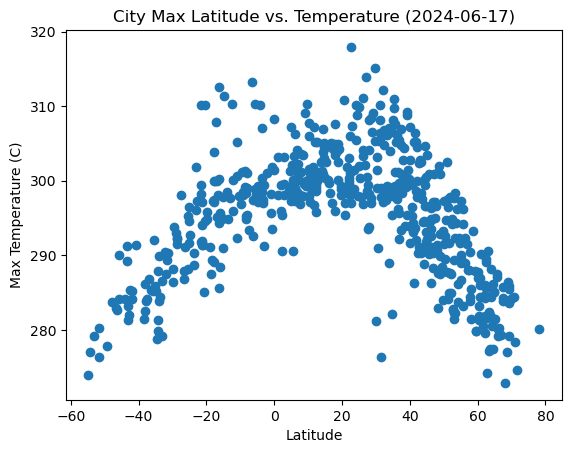

In [6]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

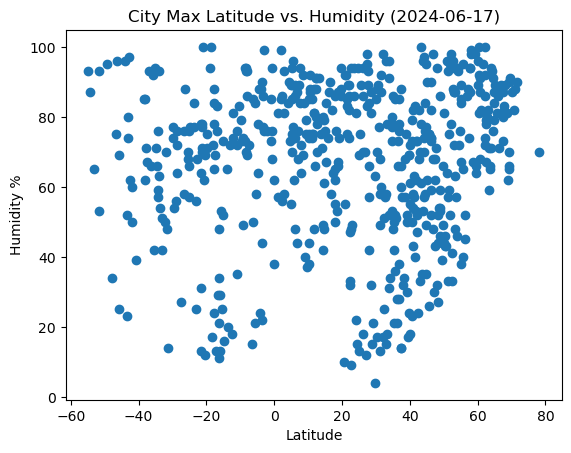

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Max Latitude vs. Humidity (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

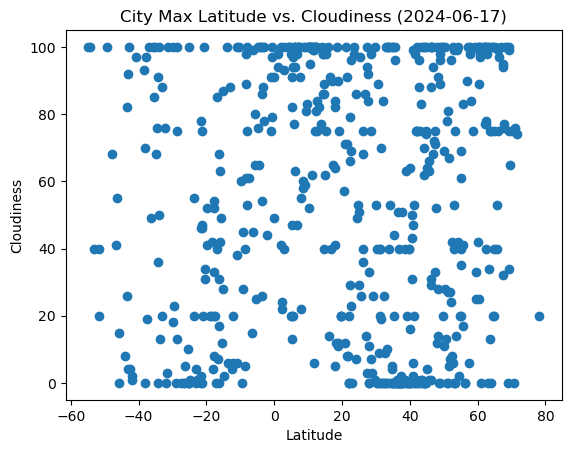

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

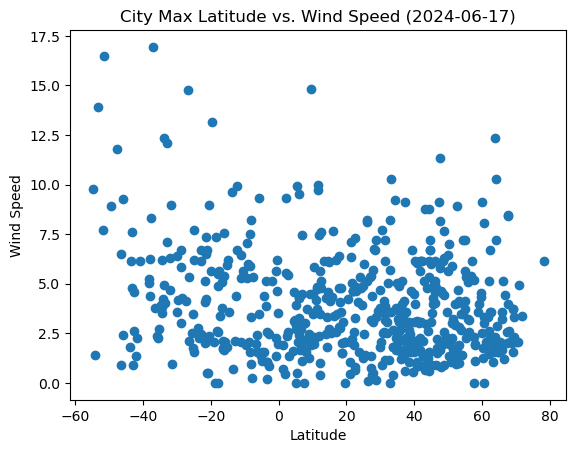

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude vs. Wind Speed (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,289.49,79,40,3.60,CA,1724868340
1,shingu,33.7333,135.9833,298.49,91,100,1.80,JP,1724868341
2,tura,25.5198,90.2201,297.77,89,26,1.39,IN,1724868342
4,ilulissat,69.2167,-51.1000,279.16,70,75,1.54,GL,1724868344
6,kodiak,57.7900,-152.4072,283.88,87,100,0.00,US,1724868346


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,avarua,-21.2078,-159.7750,297.18,78,75,6.69,CK,1724868343
5,waitangi,-43.9535,-176.5597,284.16,96,8,1.79,NZ,1724868345
10,san clemente del tuyu,-36.3569,-56.7235,285.40,66,49,3.80,AR,1724868398
11,margaret river,-33.9500,115.0667,289.92,93,100,12.34,AU,1724868399
14,port-aux-francais,-49.3500,70.2167,277.86,95,100,8.94,TF,1724868183


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4841577072225962


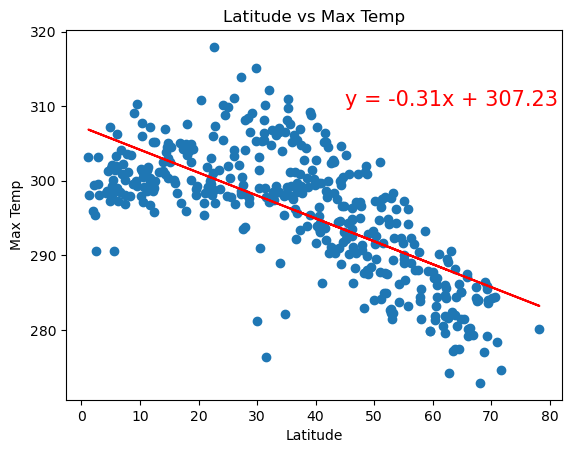

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,310),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()


The r^2-value is: 0.5927598561413238


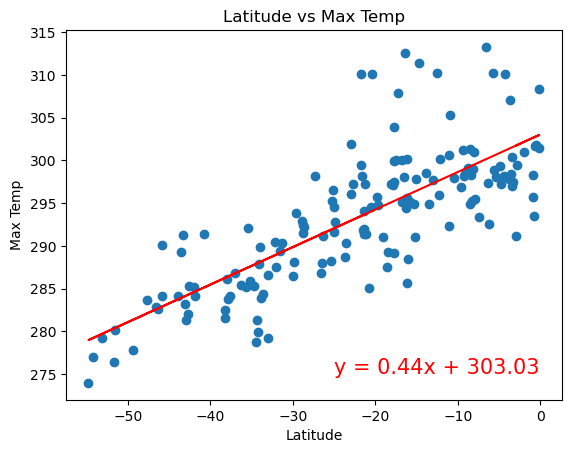

In [27]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,275),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.002250862766222071


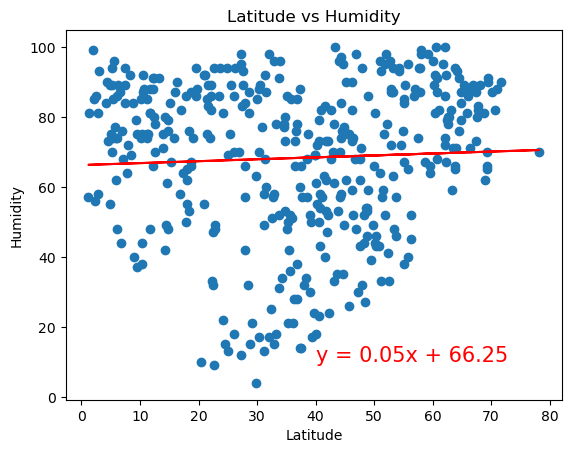

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8)fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.0018780764967087267


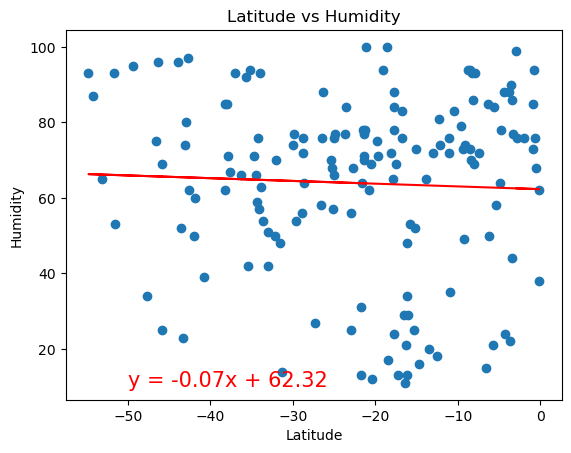

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8)fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.009476654276128397


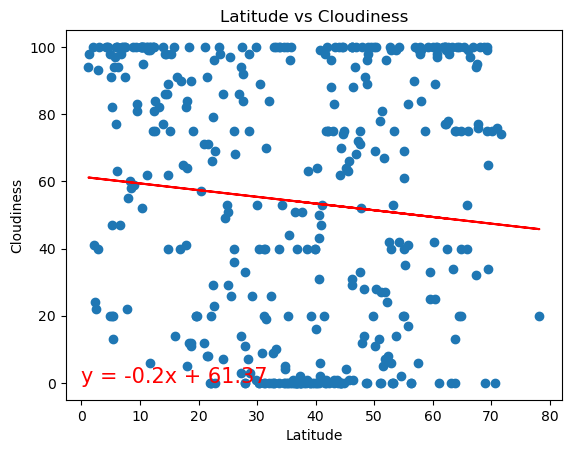

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8)fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.013609246685326929


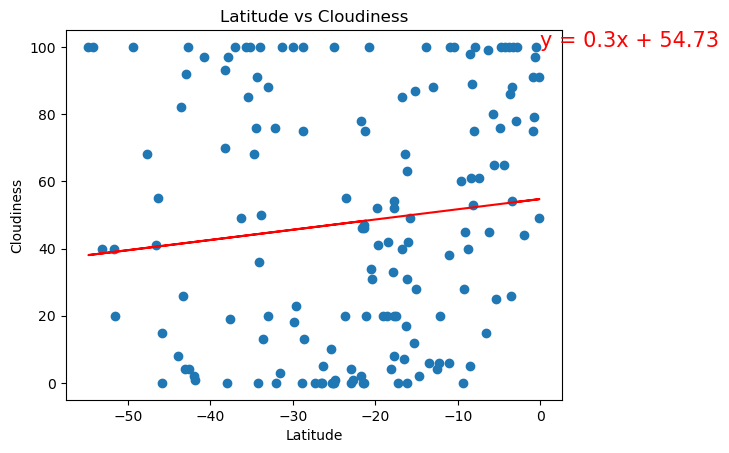

In [38]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8)fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0008179030900590512


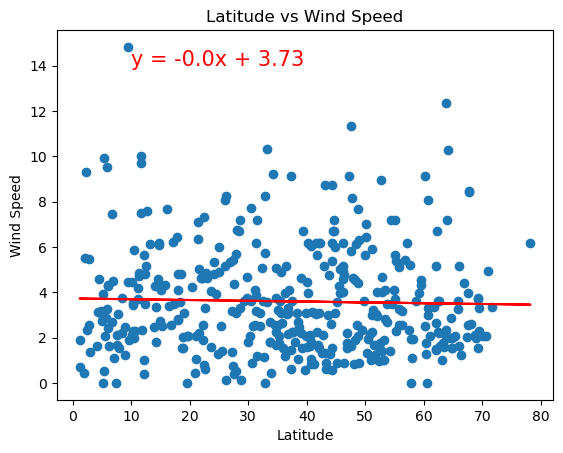

In [40]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8)fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.10234518909478343


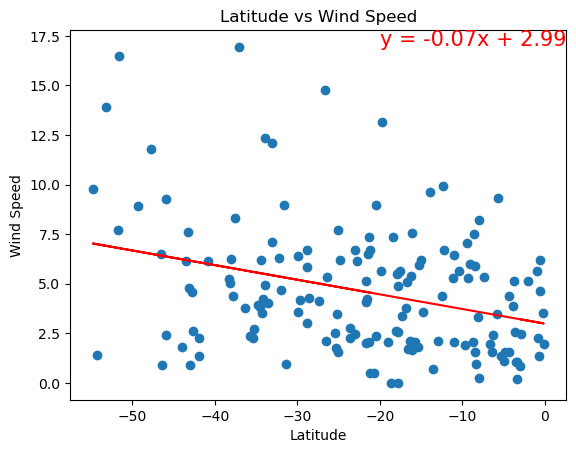

In [42]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8)fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(-20,17),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE